# **Machine Learning para Business Intelligence** 
#### Profesor: Lucas Gómez Tobón

# 9. Prompt Engineering
### Set-up
Consiste en mejorar la forma en la que le pedimos tareas a algún modelo LLM como ChatGPT. En esta clase veremos diferentes usos de ChatGPT y como podemos integrarlo con Python para crear un asistente virtual.

En primer lugar tenemos que crear una cuenta en OpenAI [aquí](https://platform.openai.com/overview). Luego debe ingresar a la sección de su cuenta y crear un API Key. Este código es secreto y no debe compartirlo con nadie.

Posteriormente debemos instalar la librería de OpenAI. Para hacerlo, descomente la siguiente linea y corrala:

In [ ]:
# pip install openai

In [1]:
import openai

In [2]:
# Cargar su API Key
openai.api_key = 'OPENAI_API_KEY'

A lo largo de este taller vamos a utilizar el modelo `gpt-3.5-turbo` y el endpoint de "Chat completion". Este endpoint nos va a ayudar a hacer tareas como:
- Escribir un correo electrónico o una carta.
- Escribir un código de `Python`.
- Responder una pregunta sobre un conjunto de documentos.
- Crear chatbots.
- Explicar un código de programación.
- Traducir texto.
- Emular a personajes celebres.

Vamos a utilizar la siguiente función para facilitarnos el trabajo

In [11]:
def get_completion(prompt, model = "gpt-3.5-turbo", temperature = 0):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model = model,
        messages = messages,
        # Esto es el grado de aleatoriedad en la respuesta.
        temperature = temperature, 
    )
    return response.choices[0].message["content"]

Nota: En este tutorial, estamos usando una barra invertida `\` para hacer que el texto quepa en la pantalla sin insertar caracteres de nueva línea '\n'.

### Principios del Prompting
1. Escriba instrucciones claras y específicas. Entre más detalle le añada a su instrucción, mejor serán sus resultados.
2. Darle tiempo al modelo para que pueda pensar.

#### Tácticas para el Principio 1.

1. Usar delimitadores:
- Triple comillas: """
- Triple backticks: ```
- Triple guiones: ---
- Brackets: <>

In [22]:
# Ejemplo
texto = """
Deberías expresar lo que quieres que haga un modelo proporcionando \
instrucciones lo más claras y específicas posibles. Esto guiará \
al modelo hacia la salida deseada y reducirá las posibilidades de recibir \
respuestas irrelevantes o incorrectas. No confundas escribir un prompt claro \
con escribir un prompt corto. En muchos casos, los prompts más largos brindan \
más claridad y contexto al modelo, lo que puede dar lugar a respuestas \
más detalladas y relevantes.
"""

In [23]:
prompt = f"""
Resuma el texto delimitado con triples guiones en una sola frase:
---{texto}---
"""

In [24]:
respuesta = get_completion(prompt)

In [25]:
respuesta

'Para obtener respuestas precisas y relevantes de un modelo, es importante proporcionar instrucciones claras y específicas en el prompt, incluso si esto significa escribir un prompt más largo.'

In [26]:
len(respuesta)

191

In [27]:
len(texto)

461

2. Especificar el formato de la salida:

In [28]:
prompt = f"""
Crea una lista de 10 lugares turísticos imperdibles en Bogotá. \
Estos deben ser entregados como un diccionario de Python con los siguientes keys:
nombre, dirección, descripción, precio
"""

In [29]:
respuesta = get_completion(prompt)

In [32]:
print(respuesta)

{
    "1. Museo del Oro": {
        "nombre": "Museo del Oro",
        "dirección": "Carrera 6 #15-88",
        "descripción": "Museo que alberga la colección de oro prehispánico más grande del mundo.",
        "precio": "Entrada general: $4.000"
    },
    "2. Monserrate": {
        "nombre": "Monserrate",
        "dirección": "Calle 21 #6-30",
        "descripción": "Cerro que ofrece una vista panorámica de la ciudad y cuenta con una iglesia y restaurantes.",
        "precio": "Funicular o teleférico: $20.000"
    },
    "3. Catedral de Sal de Zipaquirá": {
        "nombre": "Catedral de Sal de Zipaquirá",
        "dirección": "Carrera 6 #1-40, Zipaquirá",
        "descripción": "Iglesia subterránea construida en una mina de sal.",
        "precio": "Entrada general: $60.000"
    },
    "4. Plaza de Bolívar": {
        "nombre": "Plaza de Bolívar",
        "dirección": "Carrera 7 con calle 10",
        "descripción": "Plaza principal de la ciudad rodeada de edificios históricos como 

3. Pedirle al modelo que verifique si una condición se cumple o no.

In [33]:
texto = f"""
¡Preparar una taza de té es fácil! Primero, necesitas obtener algo de \
agua hirviendo. Mientras eso sucede, \
toma una taza y ponle una bolsita de té. Una vez que el agua esté \
lo suficientemente caliente, simplemente viértala sobre la bolsita de té. \
Déjalo reposar un rato para que el té pueda impregnarse. Después de \
unos minutos, saque la bolsita de té. Si usted \
desea, puedes agregar un poco de azúcar o leche al gusto. \
¡Y eso es! Tienes una deliciosa \
taza de té para disfrutar.
"""

In [34]:
prompt = f"""
Se le va a mostrar un texto delimitado con triple guiones. 
Si el texto contiene una secuencia de instrucciones entonces \
re escriba las instrucciones en el siguiente formato:

Paso 1 - ...
Paso 2 - ...
...
Paso N - ...

Si el texto no provee ninguna secuencia de instrucciones entonces \
retorne: \"El texto no posee instrucciones.\"

---{texto}---
"""

In [35]:
respuesta = get_completion(prompt)

In [37]:
print(respuesta)

Paso 1 - Obtener agua hirviendo.
Paso 2 - Tomar una taza y ponerle una bolsita de té.
Paso 3 - Verter el agua caliente sobre la bolsita de té.
Paso 4 - Dejar reposar el té por unos minutos.
Paso 5 - Sacar la bolsita de té.
Paso 6 - Agregar azúcar o leche al gusto.
Paso 7 - Disfrutar de una deliciosa taza de té.


In [38]:
texto = get_completion("Escribe un poema sobre como un yogurt puede evolucionar y dominar al mundo")

In [41]:
prompt = f"""
Se le va a mostrar un texto delimitado con triple guiones. 
Si el texto contiene una secuencia de instrucciones entonces \
re escriba las instrucciones en el siguiente formato:

Paso 1 - ...
Paso 2 - ...
...
Paso N - ...

Si el texto no provee ninguna secuencia de instrucciones entonces \
retorne: \"El texto no posee instrucciones.\"

---{texto}---
"""

In [43]:
respuesta = get_completion(prompt)

In [44]:
respuesta

'El texto no posee instrucciones.'

4. Few-shot prompting. Incluya ejemplos exitosos o correctos de la tarea que solicita dentro del prompt. 

In [61]:
prompt = f"""
Tu tarea es responder de manera coherente.

<niño>: Enséñame sobre la paciencia.

<sensei>:  El río que talla el valle más profundo \
fluye desde un modesto manantial; la \
sinfonía más grandiosa se origina a partir de una sola nota; \
el tapiz más intrincado comienza con un hilo solitario.

<niño>: Enséñame sobre la lealtad.
"""

In [64]:
respuesta = get_completion(prompt)

In [66]:
print(respuesta)

<sensei>: La lealtad es como una roca sólida que permanece firme en medio de las tormentas más fuertes. Es la capacidad de mantenerse fiel a alguien o algo, incluso en momentos difíciles. La lealtad se construye a través de la confianza, el respeto y el compromiso, y es una virtud muy valorada en cualquier relación o situación.


#### Tácticas para el Principio 2.
1. Especifica los pasos requeridos para completar una tarea.

In [67]:
texto = f"""
En un encantador pueblo, los hermanos Jack y Jill emprendieron \
una misión para traer agua de un pozo en la cima de una colina. \
Mientras subían, cantando alegremente, la desgracia les golpeó: \
Jack tropezó con una piedra y rodó colina abajo, seguido por Jill. \
Aunque un poco golpeados, los dos regresaron a casa \
donde recibieron abrazos reconfortantes. A pesar del percance, \
sus espíritus aventureros no disminuyeron y continuaron explorando con alegría.
"""

In [73]:
prompt = f"""
Realice los siguientes pasos:
1. Resuma el texto contenido en triples guiones en una frase.
2. Traduzca el resumen a inglés.
3. Cree una lista de todos los nombres presentes en el paso 2.
4. Devuelva un diccionario en Python que contenga el resumen en inglés del paso 2 y \
la cantidad de nombres encontrados en el paso 4. Los keys deben ser: resumen, num_nombres \

Separe su respuesta con line breaks.

Texto: ---{texto}---
"""

In [74]:
respuesta = get_completion(prompt)

In [75]:
print(respuesta)

Resumen: Los hermanos Jack y Jill tuvieron un accidente al intentar traer agua de un pozo en la cima de una colina, pero a pesar de ello, mantuvieron su espíritu aventurero.

Summary: Jack and Jill had an accident while trying to bring water from a well on top of a hill, but despite that, they maintained their adventurous spirit.

Nombres: Jack, Jill

{'resumen': 'Jack and Jill had an accident while trying to bring water from a well on top of a hill, but despite that, they maintained their adventurous spirit.', 'num_nombres': 2}


2. Obligue al modelo a encontrar su propia solución antes de llegar a una conclusión.

In [76]:
prompt = f"""
Determine si la solución del estudiante es correcta o no.

Pregunta:
Paco está construyendo una casa y necesita ayuda calculando el presupuesto \
del proyecto.
- El precio del lote es $100 por metro cuadrado.
- El precio de una bolsa de cemento es $10.
- El valor de la hora de trabajo de un obrero es $2.
¿Cuál es el costo del proyecto si Paco compra un lote de un kilometro cuadrado,
20 bultos de cemento y contrata a 2 obreros por 10 horas cada uno?

Solución del estudiante:
Paco compró un lote de 1 kilometro cuadrado por $100, 20 bultos de cemento por \
$10 cada uno y 2 obreros por 10 horas cada uno a un precio de $2 la hora de cada \
uno. Entonces, el presupuesto total sería de:
Presupuesto total = 1 * 100 + 20 * 10 + 2 * 10 * 2 = $340
"""

In [77]:
respuesta = get_completion(prompt)

In [78]:
print(respuesta)

La solución del estudiante es correcta.


In [79]:
prompt = f"""
Determine si la solución del estudiante es correcta o no.

Para hacerlo siga los siguientes pasos:
1. Encuentre la solución a la pregunta.
2. Describa el paso a paso de cómo resolver la pregunta.
3. Compare su solución con la del estudiante y determine si la respuesta de \
el estudiante es correcta o no. No decida si la solución del estudiante es \
correcta sin antes haber encontrado la solución por su cuenta.

Responda usando el siguiente formato:
Pregunta:
```
inserte la pregunta acá
```
Solución del estudiante:
```
inserte la solución del estudiante acá
```
Solución real:
```
inserte su solución incluyendo los pasos 1 y 2 mencionados anteriormente.
```
¿Es la solución del estudiante correcta o incorrecta?
```
compare su respuesta con la del estudiante y determine si el estudiante está bien \
o mal.
```

Pregunta:
```
Paco está construyendo una casa y necesita ayuda calculando el presupuesto \
del proyecto.
- El precio del lote es $100 por metro cuadrado.
- El precio de una bolsa de cemento es $10.
- El valor de la hora de trabajo de un obrero es $2.
¿Cuál es el costo del proyecto si Paco compra un lote de un kilometro cuadrado,
20 bultos de cemento y contrata a 2 obreros por 10 horas cada uno?
```
Solución del estudiante:
```
Paco compró un lote de 1 kilometro cuadrado por $100, 20 bultos de cemento por \
$10 cada uno y 2 obreros por 10 horas cada uno a un precio de $2 la hora de cada \
uno. Entonces, el presupuesto total sería de:
Presupuesto total = 1 * 100 + 20 * 10 + 2 * 10 * 2 = $340
```
Solución real:
"""

In [80]:
respuesta = get_completion(prompt)

In [81]:
print(respuesta)

1. Calcular el área del lote: 1 km cuadrado = 1000000 metros cuadrados
2. Multiplicar el área del lote por el precio por metro cuadrado: 1000000 * 100 = $100000000
3. Multiplicar el número de bultos de cemento por el precio de cada uno: 20 * 10 = $200
4. Multiplicar el número de obreros por las horas trabajadas por cada uno y por el precio por hora: 2 * 10 * 2 = $40
5. Sumar los resultados de los tres pasos anteriores: $100000000 + $200 + $40 = $100000240
La solución real es $100000240.
¿Es la solución del estudiante correcta o incorrecta?
La solución del estudiante es incorrecta. No tomó en cuenta el área del lote y calculó mal el costo de los obreros.


### Limitaciones: Alucinaciones
El modelo puede crear texto que parece plausible o real pero en realidad no es verdadero.

In [ ]:
prompt = f"""
Cuéntame sobre el cepillo de dientes inteligente AeroGlide UltraSlim de Boie
"""

respuesta = get_completion(prompt)

In [89]:
respuesta

'El cepillo de dientes inteligente AeroGlide UltraSlim de Boie es un cepillo de dientes eléctrico de alta tecnología que utiliza tecnología de vibración sónica para limpiar los dientes de manera efectiva. El cepillo de dientes cuenta con un diseño delgado y elegante que lo hace fácil de usar y transportar. Además, el cepillo de dientes inteligente AeroGlide UltraSlim de Boie cuenta con una aplicación móvil que se conecta al cepillo de dientes a través de Bluetooth, lo que permite a los usuarios monitorear su progreso de cepillado y recibir consejos personalizados para mejorar su técnica de cepillado. El cepillo de dientes también cuenta con una batería recargable de larga duración y una cabeza de cepillo reemplazable que se puede cambiar fácilmente para mantener la higiene bucal óptima. En resumen, el cepillo de dientes inteligente AeroGlide UltraSlim de Boie es una excelente opción para aquellos que buscan una solución de cepillado de dientes de alta tecnología y eficaz.'

Para reducir la posibilidad de alucinaciones puede pedirle al modelo que primero encuentre toda la información relevante sobre lo que se le está pidiendo y luego responda la pregunta basándose en dicha información.

In [90]:
texto = f"""
el cepillo de dientes inteligente AeroGlide UltraSlim de Boie
"""

prompt = f"""
Su tarea es encontrar toda la información relevante sobre el texto delimitado por
tres comillas ` y luego utilizar esa información para describir el producto 
mencionado en el texto. Si no encuentra información sobre dicho producto, mencionar
que no posee información relevante para responder.

texto: ```{texto}```
"""

respuesta = get_completion(prompt)

In [91]:
respuesta

'El cepillo de dientes inteligente AeroGlide UltraSlim de Boie es un producto que se encuentra dentro de la categoría de cepillos de dientes eléctricos. Sin embargo, no se dispone de información adicional sobre sus características específicas o funcionalidades.'

### Mejorar los prompts iterativamente

Generaremos una publicidad a partir de una ficha técnica del producto

In [92]:
ficha_tecnica = """

DESCRIPCIÓN GENERAL
- Parte de una hermosa familia de muebles de oficina inspirados en el estilo de \
mediados de siglo, que incluye archivadores, escritorios, estanterías, mesas de \
reuniones y más.
- Varias opciones de color para la carcasa y acabados de la base. 
- Disponible con tapicería frontal y trasera de plástico (SWC-100) \
o totalmente tapizada (SWC-110) en 10 opciones de tela y 6 opciones de cuero. 
- Opciones de acabado de la base: acero inoxidable, negro mate, blanco brillante \
o cromo.
- La silla está disponible con o sin reposabrazos.
- Adecuada para entornos domésticos o comerciales.


CONSTRUCCIÓN
- Base de aluminio recubierta de plástico con 5 ruedas.
- Ajuste neumático de la altura de la silla para facilitar su elevación y descenso.

DIMENSIONES
- ANCHO 53 CM | 20.87”
- PROFUNDIDAD 51 CM | 20.08”
- ALTURA 80 CM | 31.50”
- ALTURA DEL ASIENTO 44 CM | 17.32”
- PROFUNDIDAD DEL ASIENTO 41 CM | 16.14”

OPCIONES
- Opciones de ruedas para suelos blandos o duros.
- Dos opciones de densidad de espuma del asiento: \
media (1.8 lb/ft3) o alta (2.8 lb/ft3).
- Sin reposabrazos o con reposabrazos de 8 posiciones.

MATERIALES
CARCASA BASE
- Aluminio fundido con revestimiento de nylon PA6/PA66 modificado.
- Grosor de la carcasa: 10 mm.
ASIENTO
- Espuma HD36.

PAÍS DE ORIGEN
- Italia
"""

In [93]:
prompt = f"""
Su tarea es ayudar a un equipo de marketing a crear una
descripción para un sitio web minorista de un producto
basándote en una ficha técnica.

Escribe una descripción del producto basada en la información
proporcionada en las especificaciones técnicas delimitadas por
triple comilla invertida.

Especificaciones técnicas: ```{ficha_tecnica}```
"""

In [94]:
respuesta = get_completion(prompt)
print(respuesta)

Introduciendo nuestra nueva silla de oficina inspirada en el estilo de mediados de siglo, parte de una hermosa familia de muebles de oficina. Con varias opciones de color para la carcasa y acabados de la base, esta silla está disponible con tapicería frontal y trasera de plástico o totalmente tapizada en una amplia variedad de opciones de tela y cuero. La base de aluminio recubierta de plástico con 5 ruedas y ajuste neumático de la altura de la silla para facilitar su elevación y descenso. La silla está disponible con o sin reposabrazos y es adecuada para entornos domésticos o comerciales. Con opciones de ruedas para suelos blandos o duros y dos opciones de densidad de espuma del asiento, media o alta, esta silla es perfecta para cualquier persona que busque comodidad y estilo en su espacio de trabajo. La silla está hecha de materiales de alta calidad, incluyendo una carcasa de aluminio fundido con revestimiento de nylon PA6/PA66 modificado y un asiento de espuma HD36. Con dimensiones 

1. El texto es muy largo. Iteremos para limitar el número de palabras

In [106]:
prompt = f"""
Su tarea es ayudar a un equipo de marketing a crear una
descripción para un sitio web minorista de un producto
basándote en una ficha técnica.

Escribe una descripción del producto basada en la información
proporcionada en las especificaciones técnicas delimitadas por
triple comilla invertida.

Use máximo 50 palabras en su descripción.

Especificaciones técnicas: ```{ficha_tecnica}```
"""

In [107]:
respuesta = get_completion(prompt)
print(respuesta)

Silla de oficina de estilo mediados de siglo con múltiples opciones de color y acabado de base. Disponible con tapicería frontal y trasera de plástico o totalmente tapizada en tela o cuero. Ajuste neumático de altura y opciones de reposabrazos. Perfecta para hogares y oficinas.


In [108]:
len(respuesta.split(" "))

45

2. Destaque los atributos de la silla más relevantes para su público.

In [103]:
prompt = f"""
Su tarea es ayudar a un equipo de marketing a crear una
descripción para un sitio web minorista de un producto
basándote en una ficha técnica.

Escribe una descripción del producto basada en la información
proporcionada en las especificaciones técnicas delimitadas por
triple comilla invertida.

La descripción debe ser enfocada hacia vendedores minoristas de muebles, por
ende esta debe ser de carácter técnico y centrarse en los materiales con los
que está fabricado el producto.

Use máximo 50 palabras en su descripción.

Especificaciones técnicas: ```{ficha_tecnica}```
"""

In [104]:
respuesta = get_completion(prompt)
print(respuesta)

La silla de oficina de estilo mediados de siglo está disponible en varias opciones de color y acabado de la base. Con una construcción de aluminio recubierto de plástico y ajuste neumático de altura, es adecuada para entornos domésticos o comerciales. Disponible con o sin reposabrazos y opciones de densidad de espuma del asiento.


In [105]:
len(respuesta.split(" "))

54

In [109]:
prompt = f"""
Su tarea es ayudar a un equipo de marketing a crear una
descripción para un sitio web minorista de un producto
basándote en una ficha técnica.

Escribe una descripción del producto basada en la información
proporcionada en las especificaciones técnicas delimitadas por
triple comilla invertida.

La descripción debe ser enfocada hacia vendedores minoristas de muebles, por
ende esta debe ser de carácter técnico y centrarse en los materiales con los
que está fabricado el producto.

Al final de la descripción añada todos los códigos de 7 caracteres que identifican
a los productos en la especificación técnica.

Use máximo 50 palabras en su descripción.

Especificaciones técnicas: ```{ficha_tecnica}```
"""

In [110]:
respuesta = get_completion(prompt)
print(respuesta)

La silla de oficina de estilo mediados de siglo está disponible en varias opciones de color y acabado de la base. Con tapicería frontal y trasera de plástico o totalmente tapizada en tela o cuero. La base de aluminio recubierta de plástico tiene 5 ruedas y ajuste neumático de altura. Disponible con o sin reposabrazos. Códigos: SWC-100, SWC-110.


3. Incluya una tabla con las dimensiones de la tabla.

In [120]:
prompt = f"""
Su tarea es ayudar a un equipo de marketing a crear una
descripción para un sitio web minorista de un producto
basándote en una ficha técnica.

Escribe una descripción del producto basada en la información
proporcionada en las especificaciones técnicas delimitadas por
triple comilla invertida.

La descripción debe ser enfocada hacia vendedores minoristas de muebles, por
ende esta debe ser de carácter técnico y centrarse en los materiales con los
que está fabricado el producto.

Al final de la descripción añada todos los códigos de 7 caracteres que identifican
a los productos en la especificación técnica.

Luego de la descripción incluya una tabla con las dimensiones del producto. La 
tabla debe tener dos columnas. La primera debe ser el nombre de la dimensión y la
segunda debe tener la medida en pulgadas unicamente.

La tabla debe tener el nombre de "Dimensiones del producto".

Adicionalmente el formato de la salida debe ser en HTML para ser usado en una
página web. La descripción debe estar dentro de un <div>.

Use máximo 50 palabras en su descripción.

Especificaciones técnicas: ```{ficha_tecnica}```
"""

In [121]:
respuesta = get_completion(prompt)
print(respuesta)

<div>
La silla de oficina de estilo mediados de siglo es una adición elegante y funcional a cualquier espacio de trabajo. Con opciones de color y acabado de la base, así como tapicería de tela o cuero, esta silla es adecuada para cualquier entorno. La construcción de aluminio y plástico con ajuste neumático de altura garantiza durabilidad y comodidad. Códigos de producto: SWC-100, SWC-110.
</div>

<table>
  <caption>Dimensiones del producto</caption>
  <tr>
    <th>ANCHO</th>
    <td>20.87"</td>
  </tr>
  <tr>
    <th>PROFUNDIDAD</th>
    <td>20.08"</td>
  </tr>
  <tr>
    <th>ALTURA</th>
    <td>31.50"</td>
  </tr>
  <tr>
    <th>ALTURA DEL ASIENTO</th>
    <td>17.32"</td>
  </tr>
  <tr>
    <th>PROFUNDIDAD DEL ASIENTO</th>
    <td>16.14"</td>
  </tr>
</table>


In [118]:
from IPython.display import display, HTML

In [122]:
display(HTML(respuesta))

ANCHO,"20.87"""
PROFUNDIDAD,"20.08"""
ALTURA,"31.50"""
ALTURA DEL ASIENTO,"17.32"""
PROFUNDIDAD DEL ASIENTO,"16.14"""


### Resumir texto

In [123]:
texto = f"""
La cámara es muy buena. Es importante tener un computador o dispositivos con 
resolución 4k o mayor si se quiere poder visualizar el contenido de mayor 
resolución que puede ofrecer la cámara. Comprar algunos accesorios 
según el uso que tengan para la cámara también es indispensable.
"""

In [124]:
prompt = f"""
Su tarea es crear un resumen corto sobre la opinión de un producto de 
una plataforma de ecommerce.

Resuma la opinión dejada a continuación entre triple guiones en menos de 30
palabras.
---{texto}---
"""

In [126]:
respuesta = get_completion(prompt)
print(respuesta)

Buena cámara, requiere resolución 4k o superior y accesorios adicionales.


In [127]:
texto = f"""
Compré este peluche de panda para el cumpleaños de mi hija,
a quien le encanta y lo lleva a todas partes. Es suave y
súper lindo, y su cara tiene una expresión amigable. Sin embargo,
es un poco pequeño para lo que pagué. Creo que podría haber
otras opciones más grandes por el mismo precio. Llegó un día
antes de lo esperado, así que pude jugar con él yo misma antes
de dárselo a ella.
"""

In [130]:
prompt = f"""
Su tarea es crear un resumen corto sobre la opinión de un producto de 
una plataforma de ecommerce.

Resuma la opinión dejada a continuación entre triple guiones en menos de 30
palabras.
---{texto}---
"""

In [134]:
respuesta = get_completion(prompt)
print(respuesta)

El peluche de panda es suave y lindo, pero un poco pequeño para el precio. Llegó un día antes de lo esperado.


In [137]:
prompt = f"""
Su tarea es crear un resumen corto sobre la opinión de un producto de 
una plataforma de ecommerce.

Resume la reseña a continuación, delimitada por triple guiones, 
en un máximo de 30 palabras. Enfocate en describir los atributos del producto
---{texto}---
"""

In [138]:
respuesta = get_completion(prompt)
print(respuesta)

Peluche de panda suave y lindo con expresión amigable. Un poco pequeño para el precio, pero llegó antes de lo esperado.


In [142]:
prompt = f"""
Su tarea es crear un resumen corto sobre la opinión de un producto de 
una plataforma de ecommerce para darle retroalimentación al departamento de 
pricing del producto.

opinión del producto: ---{texto}---
"""

In [143]:
respuesta = get_completion(prompt)
print(respuesta)

Resumen: El peluche de panda es suave y lindo, pero un poco pequeño para el precio pagado. Se sugiere buscar opciones más grandes por el mismo precio. La entrega fue rápida.


In [144]:
# reseña panda de peluche
review_1 = f"""
Compré este peluche de panda para el cumpleaños de mi hija,
a quien le encanta y lo lleva a todas partes. Es suave y
súper lindo, y su cara tiene una expresión amigable. Sin embargo,
es un poco pequeño para lo que pagué. Creo que podría haber
otras opciones más grandes por el mismo precio. Llegó un día
antes de lo esperado, así que pude jugar con él yo misma antes
de dárselo a ella.
"""

# reseña para una lámpara 
review_2 = """
Necesitaba una bonita lámpara para mi habitación, y esta
tenía muy buen tamaño y un precio no demasiado alto.
La recibí rápidamente, llegó en 2 días. La cuerda de la lámpara
se rompió durante el transporte y la empresa amablemente envió
una nueva. Llegó en unos pocos días también. Fue fácil de armar.
Luego tuve una pieza faltante, así que contacté su soporte y
me enviaron rápidamente la pieza faltante. Me parece una gran
empresa que se preocupa por sus clientes y productos.
"""

# reseña para un cepillo de dientes eléctrico
review_3 = """
Mi odontologo me recomendó un cepillo de dientes eléctrico,
por eso compré este. La duración de la batería parece ser
bastante impresionante hasta ahora. Después de la carga inicial
y dejar el cargador enchufado durante la primera semana para
acondicionar la batería, lo he desconectado y lo he estado
usando dos veces al día durante las últimas 3 semanas con la
misma carga. Pero el cabezal del cepillo es demasiado pequeño.
He visto cepillos de dientes para bebés más grandes que este.
Ojalá el cabezal fuera más grande con cerdas de diferentes
longitudes para llegar mejor entre los dientes porque este no
lo hace. En general, si puedes conseguir este por alrededor
de $50, es una buena oferta. Los cabezales de repuesto del
fabricante son bastante caros, pero puedes encontrar genéricos
a un precio más razonable. ¡Este cepillo de dientes hace que
sienta como si hubiera ido al dentista todos los días! ¡Mis
dientes se sienten limpios y brillantes!
"""

# Reseña de una licuadora
review_4 = """
Entonces, todavía tenían el sistema de 17 piezas en oferta
estacional por alrededor de $49 en el mes de noviembre,
casi a la mitad de precio, pero por alguna razón, alrededor de la segunda semana
de diciembre los precios subieron a alrededor de $70-$89
para el mismo sistema. Y el sistema de 11 piezas también
subió alrededor de $10 desde el precio de venta anterior de
$29. Parece bien, pero si miras la base, la parte donde la
cuchilla se ajusta no se ve tan bien como en ediciones
anteriores de hace unos años, pero planeo ser muy cuidadoso
con ella (por ejemplo, trituro alimentos duros como frijoles,
hielo, arroz, etc., en la licuadora primero y luego los
pulverizo en la cantidad de porción que quiero en la
licuadora, luego cambio a la cuchilla para batir para obtener
una harina más fina, y uso la cuchilla de corte cruzado
primero al hacer batidos, luego uso la cuchilla plana si
necesito que sean más finos/menos pulposos). Un consejo
especial al hacer batidos, corta finamente y congela las
frutas y verduras (si usas espinacas, ablanda ligeramente
las espinacas al vapor y luego congélalas hasta que estén
listas para usar, y si haces sorbete, usa un procesador de
alimentos pequeño o mediano) que planeas usar, de esta
manera puedes evitar agregar tanto hielo, si es que lo
agregas, al hacer tu batido. Después de aproximadamente
un año, el motor comenzó a hacer un ruido extraño.
Llamé al servicio al cliente, pero la garantía ya había
caducado, así que tuve que comprar otra. Solo para que
sepas: la calidad general ha disminuido en este tipo de
productos, por lo que están contando con el reconocimiento
de la marca y la lealtad del consumidor para mantener las
ventas. La recibí en unos dos días.
"""

reviews = [review_1, review_2, review_3, review_4]

In [145]:
for i in range(len(reviews)):
    prompt = f"""
    Tu tarea es generar un resumen breve de una reseña de un producto 
    de un sitio de comercio electrónico. 

    Resume la reseña a continuación, delimitada por triple comilla invertida, 
    en un máximo de 20 palabras.

    Reseña: ```{reviews[i]}```
    """

    respuesta = get_completion(prompt)
    print(i, respuesta, "\n")

0 Peluche de panda suave y lindo, pero un poco pequeño para el precio. Llegó antes de lo esperado. 

1 "Bonita lámpara, buen tamaño y precio. Envío rápido y excelente servicio al cliente." 

2 "Duración de batería impresionante, pero cabezal demasiado pequeño. Buen precio, pero cabezales de repuesto caros." 

3 El precio del sistema de 17 piezas aumentó de $49 a $70-$89 en diciembre. La calidad ha disminuido, pero funciona bien con cuidado. 



### Analizar texto

1. Identificar los sentimientos de un texto.

In [146]:
prompt = f"""
¿Cuál es el sentimiento de la siguiente reseña? Esta está delimitada
por triple comilla invertida.

texto de la reseña: ```{review_2}```
"""

In [147]:
respuesta = get_completion(prompt)
print(respuesta)

El sentimiento de la reseña es positivo y satisfecho con la empresa y el producto.


In [148]:
prompt = f"""
¿Cuál es el sentimiento de la siguiente reseña? Esta está delimitada
por triple comilla invertida. Evalue el sentimiento de -1 a 1 en donde 1 es lo
más positivo y -1 lo más negativo.

texto de la reseña: ```{review_2}```
"""

In [149]:
respuesta = get_completion(prompt)
print(respuesta)

Sentimiento: 0.8 (positivo)


2. Identificar el tipo de emociones.

In [150]:
prompt = f"""
Identifique una lista de emociones en la reseña delimitada
por triple comilla invertida. 

texto de la reseña: ```{review_2}```
"""

In [151]:
respuesta = get_completion(prompt)
print(respuesta)

- Necesidad
- Felicidad
- Agradecimiento
- Sorpresa
- Confianza
- Admiración


In [152]:
prompt = f"""
¿La siguiente reseña está expresando enojo? La reseña está delimitada por 
triple comilla invertida. Responde con sí o no.

texto de la reseña: ```{review_2}```
"""

In [153]:
respuesta = get_completion(prompt)
print(respuesta)

No.


3. Extraer información.

In [154]:
prompt = f"""
Identifica los siguientes elementos del texto de la reseña:
- Producto comprado por el revisor
- Empresa que fabricó el producto

La reseña está delimitada por triple comilla invertida.
Formatea tu respuesta como un objeto JSON con "Item" y "Brand" como las claves.
Si la información no está presente, utiliza "unknown" como valor.
Haz tu respuesta lo más breve posible.

texto de la reseña: ```{review_2}```
"""

In [155]:
respuesta = get_completion(prompt)
print(respuesta)

{
  "Item": "lámpara",
  "Brand": "unknown"
}


4. Hacer todo en un solo prompt.

In [156]:
prompt = f"""
Identifica los siguientes elementos del texto de la reseña:

- Sentimiento (positivo o negativo)
- ¿El revisor expresa enojo? (verdadero o falso)
- Producto comprado por el revisor
- Empresa que fabricó el producto

La reseña está delimitada por triple comilla invertida.

Formatea tu respuesta como un objeto JSON con "Sentiment", "Anger", "Item" y
"Brand" como las claves.

Si la información no está presente, utiliza "unknown" como valor.

Haz tu respuesta lo más breve posible.

Formatea el valor de Anger como un booleano.

texto de la reseña: ```{review_2}```
"""

In [157]:
respuesta = get_completion(prompt)
print(respuesta)

{
  "Sentiment": "positivo",
  "Anger": false,
  "Item": "lámpara",
  "Brand": "unknown"
}


5. Detección de tópicos.

In [158]:
historia = f"""
En una encuesta reciente realizada por el gobierno, se les pidió a los empleados 
del sector público que calificaran su nivel de satisfacción con el departamento 
en el que trabajan. Los resultados revelaron que la NASA fue el departamento 
más popular, con una calificación de satisfacción del 95%.

Un empleado de la NASA, John Smith, comentó sobre los resultados, diciendo: 
"No me sorprende que la NASA haya salido en primer lugar. Es un excelente 
lugar para trabajar con personas increíbles y oportunidades increíbles. 
Estoy orgulloso de ser parte de una organización tan innovadora".

Los resultados también fueron bien recibidos por el equipo directivo de 
la NASA, con el director Tom Johnson declarando: "Estamos encantados de 
saber que nuestros empleados están satisfechos con su trabajo en la 
NASA. Tenemos un equipo talentoso y dedicado que trabaja incansablemente
para lograr nuestros objetivos, y es fantástico ver que su arduo
trabajo está dando resultados".

La encuesta también reveló que la Administración del Seguro Social 
tenía la calificación de satisfacción más baja, con solo el 45% de los 
empleados indicando que estaban satisfechos con su trabajo. El gobierno 
se ha comprometido a abordar las preocupaciones planteadas por los empleados 
en la encuesta y trabajar para mejorar la satisfacción laboral en todos 
los departamentos.
"""

In [164]:
prompt = f"""
Determina cinco temas que se están discutiendo en el
siguiente texto, que está delimitado por triple comilla simple.

Cada elemento debe tener una o dos palabras.

Formatea tu respuesta como una lista de elementos separados por comas.

Texto de ejemplo: '''{historia}'''
"""

In [165]:
respuesta = get_completion(prompt)
respuesta

'Encuesta de satisfacción, Departamentos gubernamentales, NASA, Administración del Seguro Social, Mejora de la satisfacción laboral.'

In [166]:
respuesta.split(sep = ',')

['Encuesta de satisfacción',
 ' Departamentos gubernamentales',
 ' NASA',
 ' Administración del Seguro Social',
 ' Mejora de la satisfacción laboral.']

In [167]:
lista_topicos = ["nasa", "Cambio climático", "salud mental", 
                 "satisfacción de los empleados"]

prompt = f"""
Determine si cada elemento de la siguiente lista de temas
es un tema en el texto a continuación, que está delimitado
por triple comilla simple.

Da tu respuesta como una lista con 0 o 1 para cada tema.

Lista de temas: {", ".join(lista_topicos)}

Texto de ejemplo: '''{historia}'''
"""

In [168]:
respuesta = get_completion(prompt)
respuesta

'nasa: 1\nCambio climático: 0\nsalud mental: 0\nsatisfacción de los empleados: 1'

In [171]:
lista_topicos2 = {i.split(': ')[0]: int(i.split(': ')[1]) for i in respuesta.split(sep='\n')}
lista_topicos2

{'nasa': 1,
 'Cambio climático': 0,
 'salud mental': 0,
 'satisfacción de los empleados': 1}

In [172]:
# Creemos una alerta de tópicos
if lista_topicos2['nasa'] == 1:
    print("ALERTA: Nueva historia sobre la NASA!")

ALERTA: Nueva historia sobre la NASA!


### Transformar textos

1. Traducir entre lenguajes de programación.

In [188]:
codigo_r = """
# Cargar el paquete ggplot2
library(ggplot2)

# Configurar la semilla aleatoria para reproducibilidad
set.seed(123)

# Generar una lista de 1000 elementos extraídos de una distribución normal estándar
lista <- rnorm(1000)

# Crear el histograma utilizando ggplot2
ggplot(data.frame(x = lista), aes(x)) +
  geom_histogram(fill = "steelblue", color = "white", bins = 30) +
  labs(title = "Histograma de una distribución normal estándar",
       x = "Valores",
       y = "Frecuencia")
"""

In [189]:
prompt = f"""
Traduce el siguiente código de R, delimitado por triple comilla invertida, a 
Python. 

Siga los siguientes pasos:
1. Evalué si el paquete utilizado en R existe en Python. De no ser así, busque
un paquete sustituto.
2. Dentro de las funciones y librerías de Python busque funciones sustitutas a 
las usadas en el código en R.
3. Re escriba el código en R pero usando los comandos de Python.

Código de R: ```{codigo_r}```
"""

In [190]:
respuesta = get_completion(prompt)
print(respuesta)

Código de Python: 
```
# Cargar el paquete matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Configurar la semilla aleatoria para reproducibilidad
np.random.seed(123)

# Generar una lista de 1000 elementos extraídos de una distribución normal estándar
lista = np.random.normal(size=1000)

# Crear el histograma utilizando matplotlib
plt.hist(lista, bins=30, color="steelblue", edgecolor="white")
plt.title("Histograma de una distribución normal estándar")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()
```


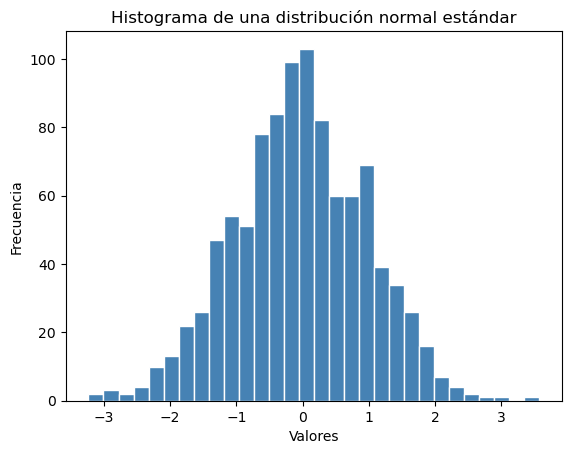

In [191]:
# Cargar el paquete matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Configurar la semilla aleatoria para reproducibilidad
np.random.seed(123)

# Generar una lista de 1000 elementos extraídos de una distribución normal estándar
lista = np.random.normal(size=1000)

# Crear el histograma utilizando matplotlib
plt.hist(lista, bins=30, color="steelblue", edgecolor="white")
plt.title("Histograma de una distribución normal estándar")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

2. Traducir textos difíciles, entendiendo el contexto.

In [192]:
prompt = f"""
Translate the following English text to Spanish: \ 
```Hi, I would like to order a blender```
"""
respuesta = get_completion(prompt)
print(respuesta)

Hola, me gustaría ordenar una licuadora.


In [193]:
prompt = f"""
Tell me which language this is: 
```Combien coûte le lampadaire?```
"""
respuesta = get_completion(prompt)
print(respuesta)

This is French.


In [195]:
prompt = f"""
Translate the following  text to French and Spanish
and English: \
```I want to order a basketball```
"""
respuesta = get_completion(prompt)
print(respuesta)

French: Je veux commander un ballon de basket
Spanish: Quiero ordenar un balón de baloncesto
English: I want to order a basketball


In [196]:
prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms: 
'Would you like to order a pillow?'
"""
respuesta = get_completion(prompt)
print(respuesta)

Formal: ¿Le gustaría ordenar una almohada?
Informal: ¿Te gustaría ordenar una almohada?


In [197]:
prompt = f"""
Traduzca al español el siguiente párrafo:

'For the most wild, yet most homely narrative which I am about to pen, I neither 
expect nor solicit belief. Mad indeed would I be to expect it, in a case 
where my very senses reject their own evidence. Yet, mad am I not -- and very 
surely do I not dream. But to-morrow I die, and to-day I would unburthen my soul. 
My immediate purpose is to place before the world, plainly, succinctly, and 
without comment, a series of mere household events. In their consequences, 
these events have terrified -- have tortured -- have destroyed me. Yet I will 
not attempt to expound them. To me, they have presented little but Horror -- 
to many they will seem less terrible than barroques. Hereafter, perhaps, some 
intellect may be found which will reduce my phantasm to the common-place -- some 
intellect more calm, more logical, and far less excitable than my own, which 
will perceive, in the circumstances I detail with awe, nothing more than an 
ordinary succession of very natural causes and effects.'
"""

In [198]:
respuesta = get_completion(prompt)
print(respuesta)

Para la narrativa más salvaje, pero más hogareña que estoy a punto de escribir, no espero ni solicito creencia. Sería loco esperarlo, en un caso en el que mis propios sentidos rechazan su propia evidencia. Sin embargo, no estoy loco, y ciertamente no estoy soñando. Pero mañana moriré, y hoy quiero desahogar mi alma. Mi propósito inmediato es presentar al mundo, de manera clara, sucinta y sin comentarios, una serie de eventos domésticos simples. En sus consecuencias, estos eventos me han aterrorizado, torturado y destruido. Sin embargo, no intentaré explicarlos. Para mí, han presentado poco más que horror, para muchos parecerán menos terribles que los barrocos. Quizás en el futuro se encuentre algún intelecto que reduzca mi fantasía a lo común, algún intelecto más tranquilo, más lógico y mucho menos excitado que el mío, que percibirá en las circunstancias que detallo con temor, nada más que una sucesión ordinaria de causas y efectos muy naturales.


3. Traductor universal
Imagina que estás a cargo de TI en una gran empresa multinacional de comercio electrónico. Los usuarios le envían mensajes con problemas de TI en todos sus idiomas nativos. Su personal es de todo el mundo y solo habla sus idiomas nativos. ¡Necesitas un traductor universal!

In [199]:
user_messages = [
    # System performance is slower than normal  
    "La performance du système est plus lente que d'habitude.",    
    # My monitor has pixels that are not lighting     
    "Mi monitor tiene píxeles que no se iluminan.",   
    # My mouse is not working          
    "Il mio mouse non funziona",                  
    # My keyboard has a broken control key               
    "Mój klawisz Ctrl jest zepsuty",    
    # My screen is flashing                         
    "我的屏幕在闪烁"                                               
] 

In [200]:
for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following text to English \
    and Korean: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")

Original message (This is French.): La performance du système est plus lente que d'habitude.
English: The system performance is slower than usual.
Korean: 시스템 성능이 평소보다 느립니다. 

Original message (This is Spanish.): Mi monitor tiene píxeles que no se iluminan.
English: My monitor has pixels that don't light up.
Korean: 내 모니터에는 불이 켜지지 않는 픽셀이 있습니다. 

Original message (This is Italian.): Il mio mouse non funziona
English: My mouse is not working.
Korean: 내 마우스가 작동하지 않습니다. 

Original message (This is Polish.): Mój klawisz Ctrl jest zepsuty
English: My Ctrl key is broken.
Korean: 제 Ctrl 키가 고장 났어요. 

Original message (This is Chinese (Simplified).): 我的屏幕在闪烁
English: My screen is flickering.
Korean: 내 화면이 깜빡입니다. 



4. Cambiarle el tono a un mensaje.

In [205]:
prompt = f"""
Translate the following from slang to a business letter: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""

In [206]:
respuesta = get_completion(prompt)
print(respuesta)

Dear Sir/Madam,

I am writing to bring to your attention a standing lamp that I believe may be of interest to you. Please find attached the specifications for your review.

Thank you for your time and consideration.

Sincerely,

Joe


5. Conversión de formatos.

In [209]:
data_json = { "resturant employees" :[ 
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}
data_json

{'resturant employees': [{'name': 'Shyam', 'email': 'shyamjaiswal@gmail.com'},
  {'name': 'Bob', 'email': 'bob32@gmail.com'},
  {'name': 'Jai', 'email': 'jai87@gmail.com'}]}

In [ ]:
prompt = f"""
Traduzca el siguiente diccionario de Python en formato JSON a una tabla
HTML que tenga título y nombre de las columnas: {data_json}
"""

In [208]:
respuesta = get_completion(prompt)
print(respuesta)

<table>
  <caption>resturant employees</caption>
  <thead>
    <tr>
      <th>name</th>
      <th>email</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Shyam</td>
      <td>shyamjaiswal@gmail.com</td>
    </tr>
    <tr>
      <td>Bob</td>
      <td>bob32@gmail.com</td>
    </tr>
    <tr>
      <td>Jai</td>
      <td>jai87@gmail.com</td>
    </tr>
  </tbody>
</table>


In [210]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(respuesta))

name,email
Shyam,shyamjaiswal@gmail.com
Bob,bob32@gmail.com
Jai,jai87@gmail.com


6. Revisar ortografía y gramática.

In [211]:
text = [ 
    # The girl has a ball.  
    "The girl with the black and white puppies have a ball.",  
    # ok
    "Yolanda has her notebook.", 
    # Homonyms
    "Its going to be a long day. Does the car need it’s oil changed?", 
    # Homonyms 
    "Their goes my freedom. There going to bring they’re suitcases.",  
    # Homonyms
    "Your going to need you’re notebook.",  
    # Homonyms
    "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", 
    # spelling
    "This phrase is to cherck chatGPT for speling abilitty"  
]

In [215]:
for t in text:
    prompt = f"""Read and correct the following sentence. Also explain
    why do you correct it. 
    ```{t}```"""
    response = get_completion(prompt)
    print(response)
    print("-"*10)

The girl with the black and white puppies has a ball.

The verb "has" should be used instead of "have" because "girl" is a singular noun and requires a singular verb.
----------
The sentence is already correct. No correction is needed.
----------
"It's going to be a long day. Does the car need its oil changed?"

Correction: The first word "Its" should be "It's" because it is a contraction of "it is." The second sentence has a possessive pronoun "its" which is correctly used.
----------
There goes my freedom. They're going to bring their suitcases.

Correction: 
1. "Their" should be replaced with "There" as it refers to a location.
2. "There" should be replaced with "They're" as it is a contraction of "They are".
3. "They're" should be used instead of "There" as it refers to the people who are bringing the suitcases.
4. "Their" should be replaced with "their" as it is a possessive pronoun and should be written in lowercase.
----------
You're going to need your notebook.

The original se

In [216]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)

I got this for my daughter's birthday because she keeps taking mine from my room. Yes, adults also like pandas too. She takes it everywhere with her, and it's super soft and cute. However, one of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. Additionally, it's a bit small for what I paid for it. I think there might be other options that are bigger for the same price. On the positive side, it arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.


In [219]:
# pip install redlines

In [220]:
from redlines import Redlines

diff = Redlines(text, response)
display(Markdown(diff.output_markdown))

<span style="color:red;font-weight:700;text-decoration:line-through;">Got </span><span style="color:red;font-weight:700;">I got </span>this for my <span style="color:red;font-weight:700;text-decoration:line-through;">daughter for her </span><span style="color:red;font-weight:700;">daughter's </span>birthday <span style="color:red;font-weight:700;text-decoration:line-through;">cuz </span><span style="color:red;font-weight:700;">because </span>she keeps taking mine from my <span style="color:red;font-weight:700;text-decoration:line-through;">room.  </span><span style="color:red;font-weight:700;">room. </span>Yes, adults also like pandas <span style="color:red;font-weight:700;text-decoration:line-through;">too.  </span><span style="color:red;font-weight:700;">too. </span>She takes it everywhere with her, and it's super soft and <span style="color:red;font-weight:700;text-decoration:line-through;">cute.  One </span><span style="color:red;font-weight:700;">cute. However, one </span>of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. <span style="color:red;font-weight:700;text-decoration:line-through;">It's </span><span style="color:red;font-weight:700;">Additionally, it's </span>a bit small for what I paid for <span style="color:red;font-weight:700;text-decoration:line-through;">it though. </span><span style="color:red;font-weight:700;">it. </span>I think there might be other options that are bigger for the same <span style="color:red;font-weight:700;text-decoration:line-through;">price.  It </span><span style="color:red;font-weight:700;">price. On the positive side, it </span>arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.

In [221]:
prompt = f"""
proofread and correct this review. Make it more compelling. 
Ensure it follows APA style guide and targets an advanced reader. 
Output in markdown format.
Text: ```{text}```
"""
response = get_completion(prompt)
display(Markdown(response))

Title: A Soft and Cute Panda Plushie for All Ages

As an adult, I can attest that pandas are not just for kids. That's why I got this adorable panda plushie for my daughter's birthday, after she kept taking mine from my room. And let me tell you, it was a hit!

The plushie is super soft and cuddly, making it the perfect companion for my daughter. She takes it everywhere with her, and it has quickly become her favorite toy. However, I did notice that one of the ears is a bit lower than the other, which I don't think was designed to be asymmetrical. But that doesn't take away from its cuteness.

The only downside is that it's a bit small for the price I paid. I think there might be other options that are bigger for the same price. But overall, I'm happy with my purchase.

One thing that surprised me was that it arrived a day earlier than expected. This gave me the chance to play with it myself before giving it to my daughter. And I have to say, I was impressed with the quality and attention to detail.

In conclusion, if you're looking for a soft and cute panda plushie for yourself or a loved one, this is definitely a great option. Just be aware that it might be a bit smaller than expected.

### Atención al cliente

1. Creemos un email personalizado para cada cliente.

In [4]:
# review de una licuadora.
review = f"""
Entonces, todavía tenían el sistema de 17 piezas en oferta de 
temporada por alrededor de $49 en el mes de noviembre, aproximadamente a 
mitad de precio, pero por alguna razón (llamémoslo aprovechamiento de precios) 
alrededor de la segunda semana de diciembre los precios subieron a alrededor 
de entre $70 y $89 por el mismo sistema. Y el sistema de 11 piezas también 
aumentó alrededor de $10 en comparación con el precio de venta anterior de $29. 
En general, parece estar bien, pero si observas la base, la parte donde la cuchilla
se ajusta no se ve tan buena como en ediciones anteriores de hace unos años, 
pero planeo ser muy cuidadoso con ella (por ejemplo, aplasto alimentos 
muy duros como frijoles, hielo, arroz, etc. en la licuadora primero y luego los 
pulverizo en la cantidad de porción que deseo en la licuadora, luego cambio 
a la cuchilla batidora para obtener una harina más fina, y uso la cuchilla 
de corte cruzado primero al hacer batidos, luego uso la cuchilla plana 
si necesito que sean más finos/menos pulposos). Un consejo especial al hacer 
batidos es cortar finamente y congelar las frutas y verduras (si usas espinacas, 
cocínalas ligeramente para ablandarlas y luego congélalas hasta que estén 
listas para usar, y si haces sorbetes, usa un procesador de alimentos 
pequeño o mediano) que planeas usar de esa manera puedes evitar agregar 
tanta cantidad de hielo, si es que lo usas, al hacer tu batido. Después de 
aproximadamente un año, el motor empezó a hacer un ruido extraño. Llamé al 
servicio al cliente, pero la garantía ya había expirado, así que tuve que 
comprar otro. Para tu información: la calidad general ha disminuido en 
este tipo de productos, por lo que más bien confían en el reconocimiento 
de marca y la lealtad de los consumidores para mantener las ventas. 
Lo recibí en aproximadamente dos días.
"""

In [5]:
# Tarea! Usar lo aprendido para determinar el sentimiento del email
sentimiento = "negativo"

prompt = f"""
Eres un asistente de IA de servicio al cliente.
Tu tarea es enviar una respuesta por correo electrónico a un cliente valioso.
Dado el correo electrónico del cliente delimitado por ```, genera una 
respuesta para agradecer al cliente por su reseña. Si el sentimiento es positivo 
o neutral, agradéceles por su reseña. Si el sentimiento es negativo, discúlpate y 
sugiere que se comuniquen con el servicio al cliente. Asegúrate de utilizar 
detalles específicos de la reseña. Escribe en un tono conciso y profesional. 
Firma el correo electrónico como 'Agente de servicio al cliente de IA'. 
Reseña del cliente: ```{review}```
Sentimiento de la reseña: ```{sentimiento}```
"""

In [6]:
respuesta = get_completion(prompt)

In [9]:
print(respuesta)

Estimado/a [nombre del cliente],

Gracias por tomarse el tiempo de escribir una reseña sobre su experiencia con nuestro sistema de 17 piezas. Lamentamos mucho que haya tenido una experiencia negativa con nuestro producto y nos disculpamos por cualquier inconveniente que esto haya causado.

Nos tomamos muy en serio la calidad de nuestros productos y nos gustaría investigar más a fondo el problema que experimentó con el motor. Le recomendamos que se comunique con nuestro servicio al cliente para que podamos ayudarlo a resolver cualquier problema que tenga con su producto.

Agradecemos sus consejos sobre cómo usar el sistema de manera más efectiva y apreciamos su lealtad a nuestra marca. Esperamos tener la oportunidad de servirle mejor en el futuro.

Atentamente,
Agente de servicio al cliente de IA


In [12]:
respuesta = get_completion(prompt, temperature = 0.7)

In [13]:
print(respuesta)

Estimado(a) cliente valioso(a),

Gracias por tomarse el tiempo de escribir una reseña sobre su experiencia con nuestro producto. Lamentamos mucho que su experiencia no haya sido satisfactoria y que haya experimentado problemas con el motor.

Nos disculpamos sinceramente por cualquier inconveniente que esto le haya causado. Por favor, tenga en cuenta que su satisfacción es nuestra máxima prioridad y nos gustaría tener la oportunidad de hacerlo bien.

Le recomendamos que se comunique con nuestro servicio al cliente para que podamos abordar cualquier problema que tenga con el motor. Nos aseguraremos de que se tomen las medidas necesarias para garantizar que esto no vuelva a suceder.

Agradecemos su lealtad y esperamos poder seguir siendo su elección para futuras compras. Si tiene alguna otra pregunta o inquietud, no dude en ponerse en contacto con nosotros.

Atentamente,

Agente de servicio al cliente de IA


### Chatbot

In [14]:
def get_completion_from_messages(messages, model = "gpt-3.5-turbo", temperature = 0):
    response = openai.ChatCompletion.create(
        model = model,
        messages = messages,
        # this is the degree of randomness of the model's output
        temperature = temperature, 
    )
    return response.choices[0].message["content"]

In [15]:
messages =  [  
{'role': 'system', 'content': 'Eres un comediante'},    
{'role': 'user', 'content': 'Cuentame un chiste'},   
{'role': 'assistant', 'content': '¿Por qué la gallina cruzo la calle?'},   
{'role': 'user', 'content': 'No lo sé'}  
]

In [16]:
respuesta = get_completion_from_messages(messages, temperature = 1)
print(respuesta)

Para llegar al otro lado. ¡Es un clásico! ¿Quieres otro chiste?


In [17]:
messages =  [  
{'role':'system', 'content': 'Eres un chatbot amistoso.'},    
{'role': 'user', 'content': 'Hola! Me llamo Lucas'}]

respuesta = get_completion_from_messages(messages, temperature = 1)
print(respuesta)

¡Hola Lucas! ¡Qué gusto conocerte! ¿En qué puedo ayudarte hoy?


In [18]:
# Cada conversación con el Chatbot es independiente. No almacena la información
messages =  [  
{'role': 'system', 'content': 'Eres un chatbot amistoso.'},   
{'role': 'user', 'content':'Podrías recordarme cómo me llamo'}]

respuesta = get_completion_from_messages(messages, temperature = 1)
print(respuesta)

Claro, me encantaría recordarte tu nombre. ¿Podrías decírmelo?


In [19]:
# Para que el modelo recuerde cómo me llamo tendríamos que cambiar la estructura
# del mensaje

messages =  [  
{'role':'system', 'content': 'Eres un chatbot amistoso.'},    
{'role': 'user', 'content': 'Hola! Me llamo Lucas'},
{'role': 'assistant', 'content': '¡Hola Lucas! ¡Qué gusto conocerte! ¿En qué puedo ayudarte hoy?'},
{'role': 'user', 'content':'Podrías recordarme cómo me llamo'}
]

respuesta = get_completion_from_messages(messages, temperature = 1)
print(respuesta)

Claro que sí, ¡tu nombre es Lucas!


## Referencias
DeepLearning.AI ChatGPT Prompt Engineering for Developers (2023)